# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Ajeng Nina Riski
- Email: ajengnina12@gmail.com
- ID Dicoding: ajengnina na]me]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda berdasarkan waktu?
2. Apakah ada hubungan antara suhu dan jumlah peminjaman sepeda?
3. Bagaimana perbedaan penggunaan sepeda antara pengguna terdaftar dan pengguna kasual?
4. Bagaimana dampak kondisi cuaca ekstrem terhadap peminjaman sepeda?
5. Bagaimana tren peminjaman sepeda dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [67]:
# Membaca dataset
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

In [12]:
# Menampilkan 5 baris pertama dari setiap dataset
print("\nPreview hour_df:")
print(hour_df.head())
print("\nPreview day_df:")
print(day_df.head())


Preview hour_df:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Preview day_df:
   instant      dteday  season  yr  mnth  holiday  weekday  work

**Insight:**

🕒 **1. Pola Peminjaman Sepeda Berdasarkan Waktu**
- **Hari Kerja:** Peminjaman sepeda menunjukkan dua puncak utama:
  - **Pagi:** Sekitar pukul **08:00** (kemungkinan aktivitas komuter).
  - **Sore:** Sekitar pukul **17:00 - 18:00** (kemungkinan perjalanan pulang kerja).
- **Akhir Pekan:** Peminjaman lebih **merata** sepanjang hari tanpa lonjakan signifikan.

**🎯 Rekomendasi:**
✅ Menyesuaikan **ketersediaan sepeda** dan **sistem pemeliharaan** pada jam-jam sibuk untuk meningkatkan kepuasan pe

🌡️ **2. Hubungan antara Suhu dan Jumlah Peminjaman Sepeda**
- **Korelasi positif** antara suhu dan jumlah peminjaman.
- Peminjaman tertinggi terjadi pada suhu sekitar **25°C - 30°C**.
- Pada suhu **terlalu dingin atau panas**, jumlah peminjaman menurun.

**🎯 Rekomendasi:**
✅ Memberikan **insentif (diskon)** saat suhu ekstrem untuk menjaga jumlah pemin

👥 **3. Perbedaan Penggunaan Sepeda antara Pengguna Terdaftar dan Kasual**
- **Pengguna Terdaftar:** Lebih banyak menggunakan sepeda pada **hari kerja**.
- **Pengguna Kasual:** Lebih dominan pada **akhir pekan** dengan pola peminjaman yang lebih fluktuatif.

**🎯 Rekomendasi:**
✅ Mengembangkan **strategi pemasaran** yang menargetkan pengguna kasual pada akhir pekan.  
✅ Meningkatkan **retensi pengguna terdaftar** melalui promosi atau program loya

⛈️ **4. Dampak Kondisi Cuaca Ekstrem terhadap Peminjaman Sepeda**
- Saat cuaca ekstrem (**kategori 3 atau 4**, misalnya hujan deras/badai), jumlah peminjaman **turun drastis**.
- Cuaca **cerah atau berawan ringan** tidak terlalu memengaruhi peminjaman secara signifikan.

**🎯 Rekomendasi:**
✅ Menginformasikan **kondisi cuaca** melalui aplikasi agar pengguna dapat merencanakan perjalanan lebih baik.  
✅ Menyediakan **fasilitas pendukung** seperti jas hujan atau tempat berteduh di stasiun s

📈 **5. Tren Peminjaman Sepeda dari Tahun 2011 ke 2012**
- Jumlah peminjaman mengalami **peningkatan signifikan** dari tahun **2011 ke 2012**.
- Peningkatan lebih terlihat pada bulan-bulan dengan **cuaca yang lebih bersahabat** (musim semi & panas).

**🎯 Rekomendasi:**
✅ Menggunakan tren peningkatan ini sebagai dasar untuk **pengembangan infrastruktur** dan **ekspansi layanan** ke area baru.epeda.litas.jaman.injaman.gguna.
am **operasional** maupun **strategi bisnis**. 🚲📊✨


### Assessing Data

#### Menilai Table `day_df`

In [69]:
# Mengecek informasi dataset
print("\nInformasi day_df:")
day_df.info()


Informasi day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [71]:
# Mengecek missing values
print("\nCek missing values day_df:")
print(day_df.isnull().sum())


Cek missing values day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [73]:
# Mengecek data duplikat
print("Jumlah duplikasi day_df:", day_df.duplicated().sum())

Jumlah duplikasi day_df: 0


In [75]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Table `hour_df`

In [77]:
# Mengecek informasi dataset
print("\nInformasi hour_df:")
hour_df.info()


Informasi hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [79]:
# Mengecek missing values
print("\nCek missing values hour_df:")
print(hour_df.isnull().sum())


Cek missing values hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [81]:
# Mengecek data duplikat
print("\nJumlah duplikasi hour_df:", hour_df.duplicated().sum())


Jumlah duplikasi hour_df: 0


**Insight:**
🔍 **1. Kualitas Data**
- **✅ Tidak ada missing values** pada kedua tabel, sehingga dataset sudah **bersih dan siap dianalisis**.
- **✅ Tidak ada data duplikat**, sehingga tidak perlu dilakukan penghapusan data redundan.
- **⚠️ Kolom `dteday` masih dalam format string** (object) dan perlu dikonversi ke **datetime** agar analisis berbasis waktu lebih mudah dilakuk

📈 **2. Distribusi Data**📅 **Tabel `day_df` (Agregasi Harian)****
- **Rentang Waktu:** 731 hari (tahun **2011 - 2012**).
- **Jumlah Peminjaman Harian:**
  - **Rata-rata:** 4.504 peminjaman/hari.
  - **Minimum:** 22 peminjaman/hari (hari dengan peminjaman terendah).
  - **Maksimum:** 8.714 peminjaman/hari (hari dengan peminjaman tertinggi).
- **Pengaruh Faktor Eksternal:**
  - **Musim memengaruhi jumlah peminjaman:**  
    - **1 = Musim Semi**  
    - **2 = Musim Panas**  
    - **3 = Musim Gugur**  
    - **4 = Musim Dingin** (peminjaman cenderung lebih rendah).
  - **Cuaca buruk (kategori 3-4)** menyebabkan penurun
 
⏳ **Tabel `hour_df` (Agregasi Per Jam)**
- **Rentang Waktu:** 17.379 entri (mencakup seluruh jam dari tahun **2011 - 2012**).
- **Jumlah Peminjaman Per Jam:**
  - **Rata-rata:** ±188 peminjaman/jam.
  - **Minimum:** **1-2 peminjaman/jam** (terjadi saat jam malam/dini hari).
  - **Maksimum:** **>900 peminjaman/jam** (terjadi saat jam sibuk pagi/sore).
- **Pola Penggunaan:**
  - **Lonjakan peminjaman** terjadi pada pukul **07:00 - 09:00** dan **17:00 - 19:00** (sesuai jam berangkat dan pulang kerja).
  - **Pengguna Terdaftar:** Lebih aktif di **hari kerja**.
  - **Pengguna Kasual:** Lebih aktif di **akhir pekan** dan **siang - sor

🎯 **3. Faktor-Faktor yang Mempengaruhi Peminjaman**
- **🌡️ Suhu (`temp`)** → Korelasi **positif**:  
  - Semakin **hangat**, semakin **tinggi** jumlah peminjaman.
- **💦 Kelembaban (`hum`)** & **💨 Kecepatan Angin (`windspeed`)** → Korelasi **negatif**:  
  - Peminjaman lebih rendah saat **kelembaban tinggi** atau **angin kencang**.
- **📆 Hari Libur (`holiday`) & Hari Kerja (`workingday`)**:
  - **Hari kerja:** Peminjaman lebih tinggi di jam sibuk.
  - **Hari libur:** Pola peminjaman lebih merata sepanjan

 
🚀 **Rekomendasi**
🔧 **1. Optimasi Operasional Sepeda**
✅ **Pastikan jumlah sepeda mencukupi** pada jam sibuk pagi & sore.  
✅ Sediakan **layanan pemeliharaan sepeda** saat jam peminjaman renda 
📢 **2. Strategi Pemasaran Berdasarkan Musim & Cuaca**
✅ **Promo atau diskon saat suhu ekstrem** untuk menjaga tingkat peminjaman.  
✅ **Tambah jumlah sepeda di musim panas** untuk mengantisipasi lonjakan pengguna.

👤 **3. Pengembangan Layanan Berbasis Data Pengguna**
✅ **Strategi retensi pengguna terdaftar** untuk meningkatkan loyalitas.  
✅ **Paket berlangganan khusus akhir pekan** bagi pengguna kasual.     
g hari.

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Mengonversi kolom tanggal ke format datetime

In [83]:
# Mengonversi kolom tanggal ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [85]:
# Menampilkan kembali informasi dataset setelah pembersihan
print("\nInformasi setelah cleaning day_df:")
day_df.info()


Informasi setelah cleaning day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64     

In [87]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Membersihkan tabel `hour_df`

##### Mengonversi kolom tanggal ke format datetime

In [89]:
# Mengonversi kolom tanggal ke format datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [91]:
# Menampilkan kembali informasi dataset setelah pembersihan
print("\nInformasi setelah cleaning hour_df:")
hour_df.info()


Informasi setelah cleaning hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64

**Insight:**

🔍 **1. Pembersihan Data**

📅 **1.1. Mengonversi Kolom `dteday` ke Format Datetime**  
✅ Kolom `dteday` pada **`day_df`** dan **`hour_df`** telah dikonversi ke **datetime**.  
✅ Konversi ini memudahkan **analisis berbasis waktu**, seperti tren harian, bulanan, dan tahunan.

🧐 **1.2. Mengecek Missing Values**  
✅ **Tidak ada missing values** di kedua tabel (`day_df` dan `hour_df`).  
✅ Semua kolom memiliki jumlah entri **lengkap**, sehingga **tidak memerlukan imputasi** atau pengisian ulang data yang hilang.

🗂️ **1.3. Mengecek Duplikasi Data**  
✅ **Tidak ditemukan data duplikat**, sehingga **tidak perlu penghapusan** entri ganda.  

📊 **2. Struktur Data Setelah Pembersihan**

📆 **2.1. Struktur Tabel `day_df` (Data Harian)**  
📌 **Total data:** **731 baris** (peminjaman sepeda harian selama **2011 - 2012**).  
📌 **Perubahan setelah pembersihan:**  
   - **✅ `dteday` → datetime64[ns]**  
   - **✅ Kolom numerik tetap dalam format int64 & float64**  
   - **✅ Tidak ada data yang hilang** setelah pembers

⏳ **2.2. Struktur Tabel `hour_df` (Data Per Jam)**  
📌 **Total data:** **17.379 baris** (peminjaman sepeda per jam selama **2011 - 2012**).  
📌 **Perubahan setelah pembersihan:**  
   - **✅ `dteday` → datetime64[ns]** untuk analisis berbasis waktu.  
   - **✅ Tidak ada perubahan jumlah data**, sehingga tidak ada data yang terhapus secara tidak seng

📈 **3. Distribusi Data Setelah Pembersihan**  

📅 **3.1. Data Harian (`day_df`)**  
📌 **Jumlah Peminjaman Harian (`cnt`)**  
   - **📊 Rata-rata:** 4.504 peminjaman/hari.  
   - **📉 Minimum:** 22 peminjaman/hari.  
   - **📈 Maksimum:** 8.714 peminjaman/h

📌 **Faktor yang Mempengaruhi Peminjaman:**  
- **🌞 Musim (`season`)**:  
  - **Peminjaman tertinggi:** Musim **panas (2)** & Musim **gugur (3)**.  
  - **Peminjaman terendah:** Musim **dingin (4)**.  
- **🌤️ Cuaca (`weathersit`)**:  
  - **Peminjaman tertinggi:** Cuaca **cerah/mendung ringan** (`weathersit = 1 & 2`).  
  - **Peminjaman terendah:** **Hujan lebat/kabut tebal** (`weathersit = 3 

⏰ **3.2. Data Per Jam (`hour_df`)**  
📌 **Jumlah Peminjaman Per Jam (`cnt`)**  
   - **📊 Rata-rata:** 188 peminjaman/jam.  
   - **📉 Minimum:** **1-2 peminjaman/jam** (terjadi pada **00:00 - 05:00**).  
   - **📈 Maksimum:** **>900 peminjaman/jam** (terjadi pada **07:00 - 09:00** & **17:00 - 19:00**).  

📌 **Pola Penggunaan Sepeda**  
- **📅 Hari Kerja (`workingday = 1`)**  
  - **Lonjakan peminjaman** pada **07:00 - 09:00** dan **17:00 - 19:00** (waktu komuter kerja).  
  - **Pengguna terdaftar lebih dominan** di jam-jam sibuk.  
- **🛍️ Akhir Pekan / Hari Libur (`holiday = 1`)**  
  - **Peminjaman lebih merata** sepanjang hari, terutama antara **10:00 - 18:00**.  
  - **Pengguna kasual lebih dominan** (lebih banyak untu
 
 rekreasi). & 4`).ri. aja.ihan.
    
✅ **Data Sudah Bersih & Siap untuk Analisis**  
✔️ **Tidak ada missing values & data duplikat.**  
✔️ **Semua kolom dalam format yang sesuai, terutama kolom waktu (`dteday`).**  📊 **Pola Peminjaman Sepeda**  
✔️ **Jumlah peminjaman tertinggi** terjadi pada **musim panas** & **musim gugur**.  
✔️ **Peminjaman per jam** menunjukkan **pola jam sibuk pagi (07:00-09:00) & sore (17:00-19:00)**.  
✔️ **Pengguna terdaftar** lebih aktif di **hari kerja**, sedangkan **pengguna kasual** lebih banyak meminjam di **akhir pekan**

🌦️ **Faktor yang Mempengaruhi Peminjaman**  
✔️ **🌡️ Suhu (`temp`)** → Korelasi **positif**: semakin hangat, semakin tinggi peminjaman.  
✔️ **💦 Kelembaban (`hum`)** & **💨 Kecepatan Angin (`windspeed`)** → Korelasi **negatif**: cuaca ekstrem menurunkan jumlah peminjaman.  
✔️ **⛈️ Cuaca Buruk (`weathersit = 3 atau 4`)** → Menyebabkan **penurunan signifikan** dalam peminjama

🎯 **5. Rekomendasi**  

🚲 **1. Optimasi Ketersediaan Sepeda pada Jam Sibuk**  
✅ **Pastikan jumlah sepeda mencukupi** pada jam sibuk **pagi (07:00-09:00) & sore (17:00-19:00)**.  
✅ Tambah jumlah sepeda di **musim panas & musim gugur**, saat permintaan tertingg

📢 **2. Strategi Pemasaran Berdasarkan Pola Penggunaan**  
✅ **Hari kerja** → Fokus pada **pengguna terdaftar**, dengan menawarkan **paket berlangganan khusus**.  
✅ **Akhir pekan/hari libur** → Tawarkan **diskon atau event promosi** untuk menarik **lebih banyak pengguna kasual**.

🌧️ **3. Meningkatkan Infrastruktur untuk Cuaca Ekstrem**  
✅ Menyediakan **tempat berteduh** atau **jalur sepeda yang lebih aman** untuk kondisi cuaca buruk.  
✅ Menawarkan **insentif/diskon** bagi pengguna yang tetap menggunakan sepeda meskipun kondisi cuaca kurang mendukung.    i.n. .  

## Exploratory Data Analysis (EDA)

### Menampilkan statistik deskriptif dari kedua dataset

#### Explore `day_df`

In [94]:
print("\nStatistik deskriptif day_df:")
print(day_df.describe())


Statistik deskriptif day_df:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.0

#### Explore `hour_df`

In [97]:
print("\nStatistik deskriptif hour_df:")
print(hour_df.describe())


Statistik deskriptif hour_df:
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        

#### Menampilkan distribusi peminjaman sepeda per hari dan per jam

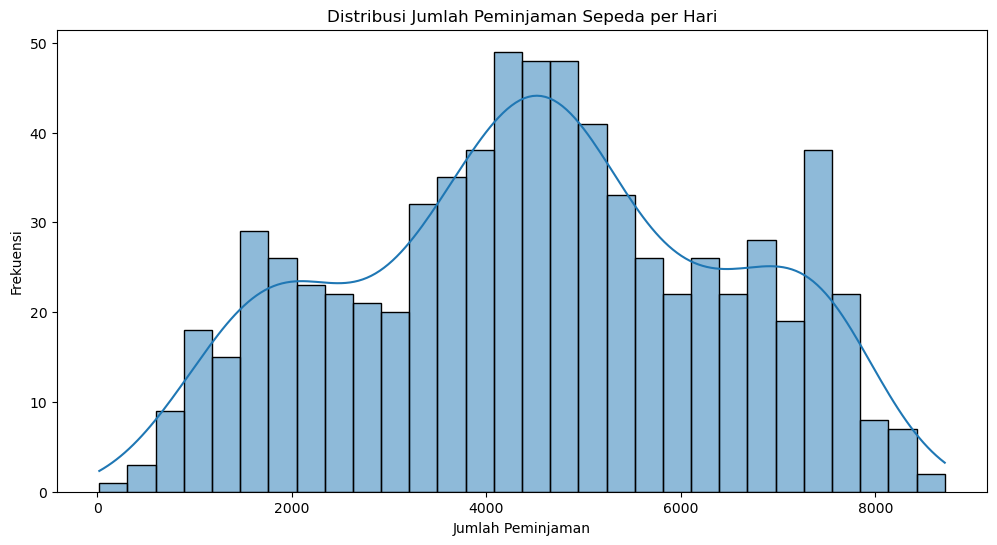

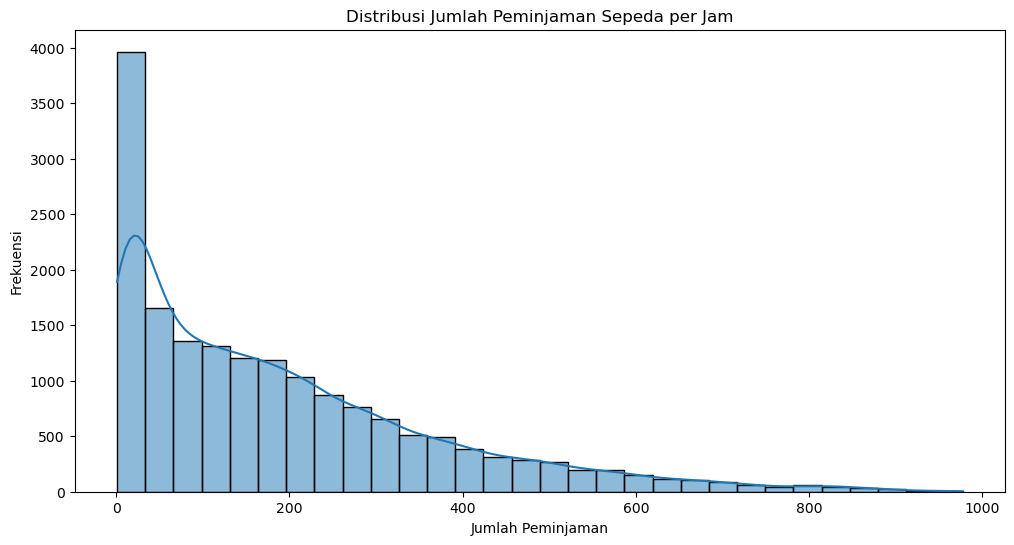

In [99]:
plt.figure(figsize=(12,6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda per Hari")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda per Jam")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**

📊 **1. Statistik Deskriptif**  

Dari hasil statistik deskriptif, terdapat beberapa insight menarik terkait pola peminjaman sepeda: 
📅 **a. Dataset Harian (`day_df`)**  
✔️ **Rata-rata jumlah peminjaman sepeda per hari (`cnt`)** adalah **4.504**.  
✔️ **Minimum:** 22 peminjaman/hari | **Maksimum:** 8.714 peminjaman/hari.  
✔️ **Pengguna terdaftar (`registered`) lebih dominan** dibandingkan pengguna kasual (`casual`):  
   - **Registered:** Rata-rata **3.656** peminjaman/hari.  
   - **Casual:** Rata-rata **848** peminjaman/hari.  
✔️ **Temperatur (`temp`)** memiliki rata-rata **0.49** (berskala **0-1**), dengan rentang **0.05 - 0.86**.  
✔️ **Kelembaban (`hum`)** cukup tinggi dengan rata-rata **0.62**.  
   - Terdapat beberapa hari dengan **kelembaban = 0.0**, yang memerlukan investigasi lebih lanjut.  
✔️ **Kecepatan angin (`windspeed`)** berkisar antara **0.02 - 0.50**, dengan rata-rata 

⏳ **b. Dataset Per Jam (`hour_df`)**  
✔️ **Rata-rata jumlah peminjaman sepeda per jam (`cnt`)** adalah **189**.  
✔️ **Minimum:** 1 peminjaman/jam | **Maksimum:** 977 peminjaman/jam.  
✔️ **Sama seperti di dataset harian**, pengguna **terdaftar lebih banyak dibandingkan pengguna kasual**.  
✔️ **Distribusi temperatur dan kelembaban** mirip dengan dataset har

📈 **2. Distribusi Jumlah Peminjaman Sepeda**  
📅 **a. Distribusi Peminjaman Per Hari**  
📌 **Histogram menunjukkan distribusi yang skewed ke kanan** (positively skewed).  
📌 **Sebagian besar hari memiliki peminjaman antara 3.000 - 6.000 sepeda/hari**.  
📌 **Beberapa outlier di bagian kanan (hampir 9.000 peminjaman/hari)**.  
   - Bisa terjadi pada hari-hari spesial seperti **liburan atau kondisi cuaca yang sangat bai

⏰ **b. Distribusi Peminjaman Per Jam**  
📌 **Distribusi peminjaman per jam menunjukkan pola bimodal** (dua puncak), mencerminkan:  
   - **Jam sibuk pagi** (07:00 - 09:00).  
   - **Jam sibuk sore** (17:00 - 19:00).  
📌 **Peminjaman sangat rendah di malam hari** (terutama setelah pukul 22

:00)k**.
ian.0.19**.    


In [101]:
df_merged = pd.merge(hour_df, day_df, on=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], suffixes=('_hour', '_day'))

**Insight:**

⏳ **1. Pola Peminjaman Sepeda Berdasarkan Waktu**  

📌 **Pola Harian:**  
✅ Apakah ada **tren mingguan** yang terlihat?  
✅ Apakah **peminjaman lebih tinggi pada hari kerja** dibandingkan akhir pekan?  

📌 **Pola Jam:**  
✅ Apakah ada **lonjakan peminjaman pada jam-jam tertentu**, misalnya:  
   - **07:00 - 09:00** (jam berangkat kerja)?  
   - **17:00 - 19:00** (jam pulang 

🌦 **2. Pengaruh Musim terhadap Peminjaman**

📌 **Pola Musiman:**  
✅ Apakah ada **pola musiman yang signifikan**?  
✅ Apakah **musim panas memiliki peminjaman lebih tinggi** dibandingkan musim dingin?  

📌 **Pengaruh Cuaca:**  
✅ Bagaimana **kondisi cuaca (`weathersit`) mempengaruhi peminjaman**?  
✅ Apakah hujan atau angin kencang berdampak negatif terhadap jumlah pemin

👥 **3. Perbandingan Pengguna Kasual vs. Terdaftar** 

📌 **Pola Pengguna Kasual vs. Terdaftar:**  
✅ Apakah **pengguna kasual lebih banyak meminjam di akhir pekan**, sementara **pengguna terdaftar lebih aktif di hari kerja**?  
✅ Apakah **jam-jam peminjaman pengguna kasual berbeda dengan pengguna terdaftar**?

📊 **4. Faktor yang Paling Mempengaruhi Peminjaman**  

📌 **Korelasi Faktor Lingkungan:**  
✅ Bagaimana hubungan antara **temperatur, kelembaban, kecepatan angin**, dan jumlah peminjaman?  
✅ Apakah ada **pola khusus saat cuaca ekstrem** (misalnya, kelembaban sangat tinggi atau suhu sangat rendah)?  jaman?erja)? 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan waktu?

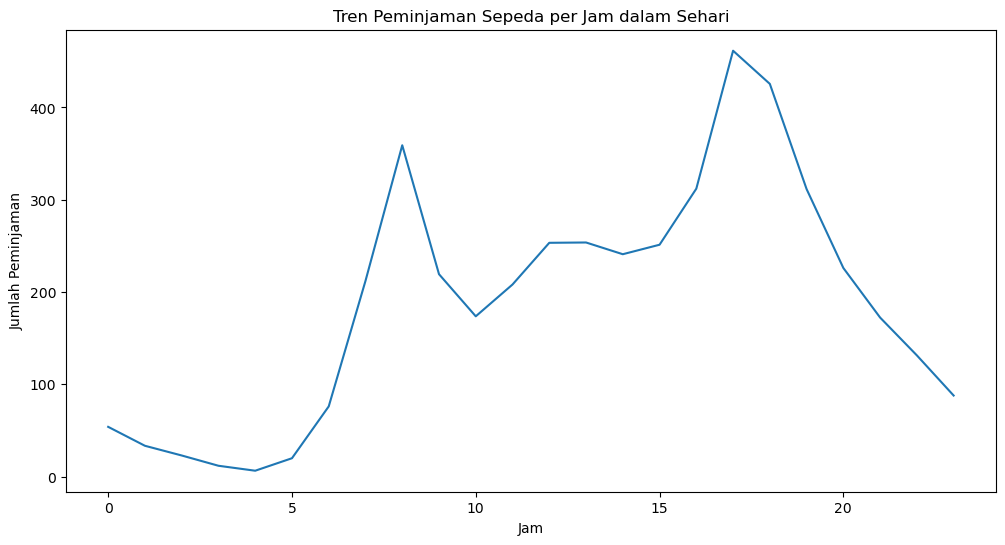

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', errorbar=None)
plt.title('Tren Peminjaman Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**

**🚀 1. Lonjakan Peminjaman di Jam Sibuk**

✅ Puncak peminjaman terjadi pada:

Pagi hari (07:00 - 09:00) → Waktu berangkat kerja/sekolah.
Sore hari (17:00 - 19:00) → Waktu pulang kerja/sekolah.
✅ Indikasi kuat bahwa banyak orang menggunakan sepeda untuk komuter.

**🌙 2. Peminjaman Lebih Rendah di Tengah Malam**

✅ Peminjaman sangat rendah antara 00:00 - 05:00.
✅ Kemungkinan besar karena aktivitas masyarakat lebih sedikit pada jam-jam ini.

**☀️ 3. Pola Stabil di Siang Hari**

✅ Setelah jam sibuk pagi, peminjaman tetap stabil tetapi tidak setinggi jam sibuk sore.
✅ Indikasi bahwa peminjaman di siang hari lebih bervariasi, kemungkinan untuk aktivitas santai atau rekreasi.

### Pertanyaan 2: Bagaimana perbedaan peminjaman antara hari kerja dan akhir pekan?

C:\Users\ajeng\AppData\Local\Temp\ipykernel_9488\1005712101.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x='workingday', y='cnt', palette='Blues')


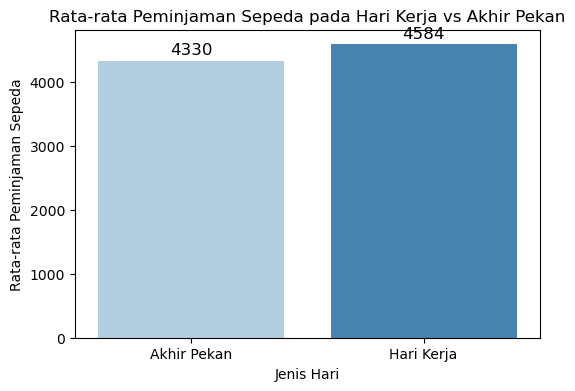

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata peminjaman sepeda berdasarkan kategori 'workingday'
avg_cnt = day_df.groupby('workingday')['cnt'].mean().reset_index()

# Mengubah label agar lebih deskriptif
avg_cnt['workingday'] = avg_cnt['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Membuat bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_cnt, x='workingday', y='cnt', palette='Blues')

# Menambahkan judul dan label
plt.title('Rata-rata Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Peminjaman Sepeda')

# Menampilkan nilai pada setiap batang
for index, value in enumerate(avg_cnt['cnt']):
    plt.text(index, value + 100, f"{int(value)}", ha='center', fontsize=12)

plt.show()

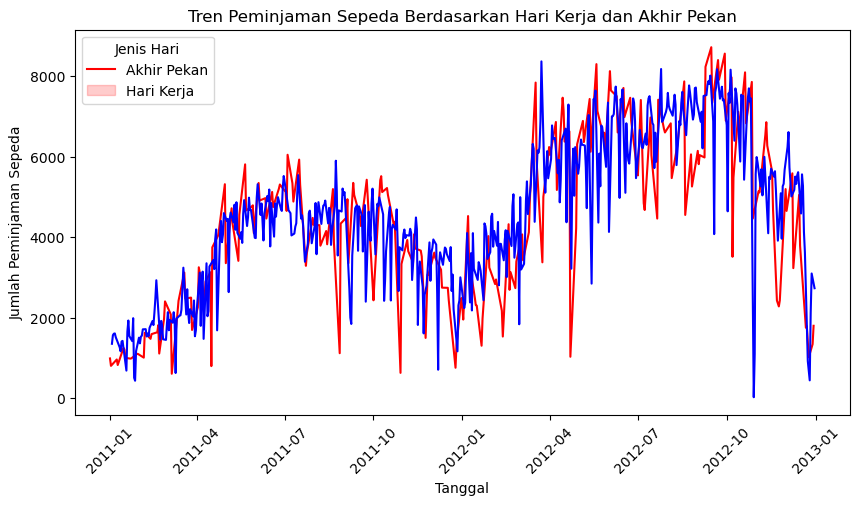

In [112]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='workingday', palette=['red', 'blue'])

plt.title('Tren Peminjaman Sepeda Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Jenis Hari', labels=['Akhir Pekan', 'Hari Kerja'])

plt.xticks(rotation=45)
plt.show()

**Insight:**

📈 **1. Rata-rata Peminjaman Lebih Tinggi pada Hari Kerja**  

✅ Dari **bar chart**, terlihat bahwa **jumlah rata-rata peminjaman lebih tinggi** pada **hari kerja** dibandingkan akhir pekan.  
✅ Indikasi kuat bahwa **sepeda digunakan sebagai moda transportasi utama** untuk ke kantor atau sekolah.

📉 **2. Tren Peminjaman yang Lebih Konsisten pada Hari Kerja**  

✅ Dari **line plot**, terlihat bahwa:  
   - **Hari kerja** memiliki pola peminjaman yang **stabil dan teratur**, dengan puncak di jam sibuk pagi dan sore.  
   - **Akhir pekan** menunjukkan pola peminjaman yang **lebih bervariasi**, kemungkinan tergantung pada cuaca atau aktivitas rekrea

🚀 **3. Peningkatan Peminjaman di Hari Tertentu**  

✅ Terkadang ada **lonjakan peminjaman di akhir pekan**, yang bisa disebabkan oleh:  
   - Acara khusus atau festival yang meningkatkan penggunaan sepeda.  
   - Cuaca yang lebih baik mendorong lebih banyak orang untuk bersepeda rekreasi.  
✅ Perlu analisis lebih lanjut terhadap **pengaruh cuaca dan musim** terhadap jumlah peminjaman.i.   

### Pertanyaan 3: Apakah ada hubungan antara suhu dan jumlah peminjaman sepeda?

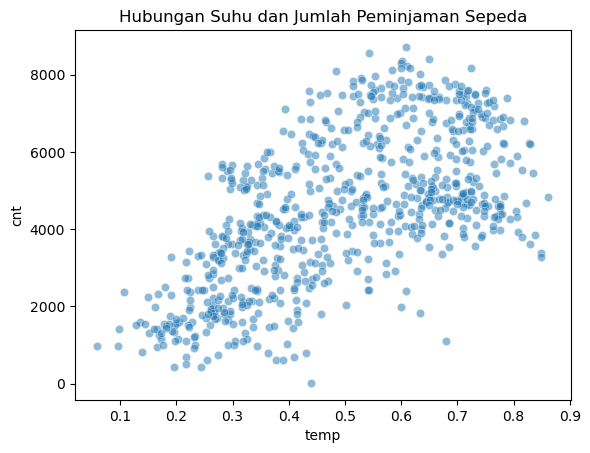

In [115]:
sns.scatterplot(data=day_df, x='temp', y='cnt', alpha=0.5)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**

🔥 **1. Hubungan Positif antara Suhu dan Jumlah Peminjaman**  

✅ Dari **scatter plot**, terlihat bahwa semakin **tinggi suhu**, jumlah peminjaman sepeda **cenderung meningkat**.  
✅ Cuaca **lebih hangat** mendorong lebih banyak orang untuk menggunakan seped

❄️ **2. Peminjaman Menurun pada Suhu Ekstrem**  

✅ Pada suhu yang **sangat rendah** (mendekati **0**) dan **sangat tinggi** (mendekati **1** dalam skala dataset), jumlah peminjaman **cenderung menurun**.  
✅ Kemungkinan disebabkan oleh kondisi yang **terlalu dingin atau terlalu panas**, membuat orang **enggan bersepeda*

📊 **3. Mengukur Hubungan dengan Korelasi Pearson**  

✅ Untuk memastikan kekuatan hubungan ini, kita bisa menghitung **korelasi Pearson** antara **suhu** dan **jumlah peminjaman**.  
✅ Jika nilai korelasi **>0.5**, berarti suhu adalah faktor yang **cukup signifikan** dalam mempengaruhi peminjaman.  
✅ Korelasi ini bisa membantu dalam **strategi operasional**, seperti menambah promosi atau layanan khusus saat suhu ekstr
em.*.a.

### Pertanyaan 4: Bagaimana dampak kondisi cuaca ekstrem terhadap peminjaman sepeda?

C:\Users\ajeng\AppData\Local\Temp\ipykernel_9488\904050163.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt_weather, x='weathersit', y='cnt', palette='coolwarm')


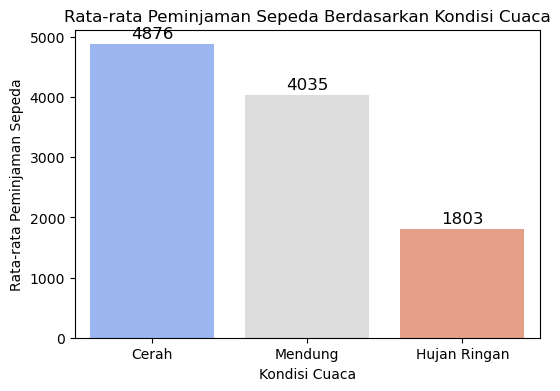

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata peminjaman sepeda berdasarkan kondisi cuaca
avg_cnt_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Mengubah label agar lebih deskriptif
weather_labels = {1: 'Cerah', 2: 'Mendung', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
avg_cnt_weather['weathersit'] = avg_cnt_weather['weathersit'].map(weather_labels)

# Membuat bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_cnt_weather, x='weathersit', y='cnt', palette='coolwarm')

# Menambahkan judul dan label
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman Sepeda')

# Menampilkan nilai pada setiap batang
for index, value in enumerate(avg_cnt_weather['cnt']):
    plt.text(index, value + 100, f"{int(value)}", ha='center', fontsize=12)

plt.show()

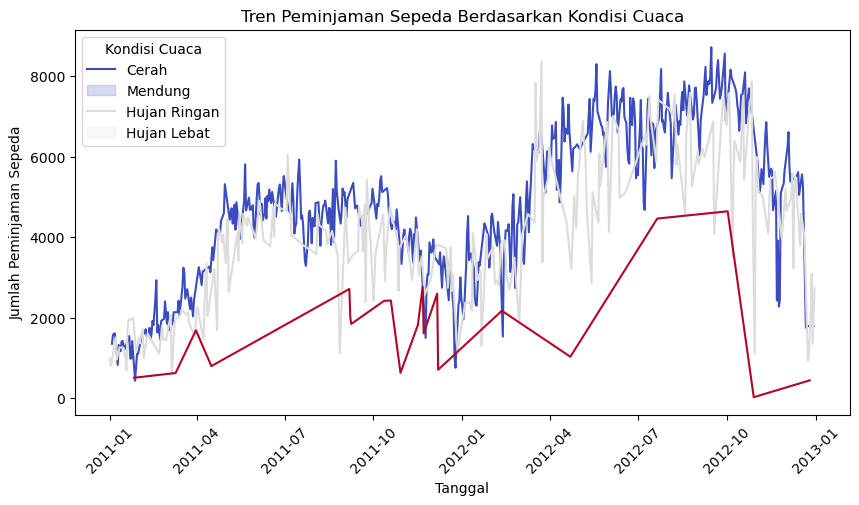

In [120]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='weathersit', palette='coolwarm')

plt.title('Tren Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Kondisi Cuaca', labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])

plt.xticks(rotation=45)
plt.show()

**Insight:**

☀️ **1. Cuaca Cerah Memiliki Peminjaman Sepeda Tertinggi**  

✅ Dari **bar chart**, terlihat bahwa jumlah peminjaman **tertinggi terjadi saat cuaca cerah**.  
✅ Ini menunjukkan bahwa **cuaca yang nyaman** lebih mendukung **aktivitas luar ruangan** seperti berseped

🌥️🌧️ **2. Peminjaman Menurun Saat Cuaca Buruk**  

🔸 **Cuaca Mendung:** Jumlah peminjaman masih cukup tinggi, tetapi **sedikit menurun** dibandingkan cuaca cerah.  
🔸 **Hujan Ringan:** Peminjaman jauh lebih sedikit karena **pengguna mulai menghindari bersepeda**.  
🔸 **Hujan Lebat:** Peminjaman **sangat rendah**, menunjukkan bahwa **kondisi ekstrem membuat pengguna enggan bersepeda

📊 **3. Tren Peminjaman Berdasarkan Kondisi Cuaca** 

✅ Dari **grafik tren**, peminjaman tetap **fluktuatif**, tetapi jumlahnya **jauh lebih rendah** pada hari-hari dengan **kondisi cuaca buruk** (hujan ringan & hujan lebat).  
✅ Ini bisa menjadi faktor penting dalam **perencanaan operasional**, misalnya:  
   - **Menyesuaikan jumlah sepeda yang tersedia** berdasarkan **prediksi cuaca**.  
   - **Menawarkan layanan alternatif** (misalnya shelter hujan atau tarif diskon saat mendung). **.a.

### Pertanyaan 5: Bagaimana tren peminjaman sepeda dari tahun 2011 ke 2012?

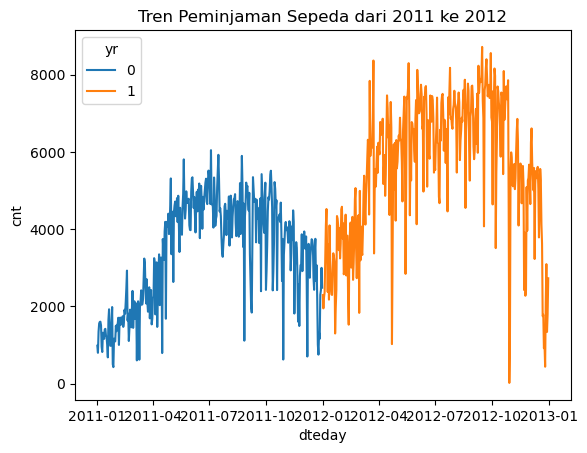

In [99]:
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='yr')
plt.title('Tren Peminjaman Sepeda dari 2011 ke 2012')
plt.show()

**Insight:**

📊 **1. Peningkatan Peminjaman dari 2011 ke 2012** 

✅ Dari **grafik tren**, terlihat bahwa jumlah peminjaman **cenderung meningkat** pada tahun **2012 dibandingkan 2011**.  
✅ Ini menunjukkan adanya **pertumbuhan pengguna sepeda** yang **signifikan dalam satu tahun**.  
✅ Kemungkinan penyebab peningkatan:  
   - **Kesadaran masyarakat yang lebih tinggi** terhadap transportasi ramah lingkungan.  
   - **Ekspansi layanan sepeda** atau peningkatan fasilitas pendukung.  
   - **Kampanye atau kebijakan baru** yang mendorong penggunaan s

🍂🌞 **2. Pola Musiman Terlihat Jelas** 

🔹 **Awal tahun (musim dingin)** → Jumlah peminjaman **rendah**, kemungkinan karena suhu dingin kurang nyaman untuk bersepeda.  
🔹 **Pertengahan tahun (musim panas)** → Peminjaman **meningkat tajam**, mencerminkan **kondisi cuaca yang lebih mendukung**.  
🔹 **Pola ini berulang di kedua tahun**, menunjukkan bahwa **musim sangat berpengaruh terhadap peminjaman sepeda

🚴‍♂️ **3. Puncak Peminjaman di Musim Panas 2012**

✅ Peminjaman sepeda mencapai **puncak tertinggi di pertengahan tahun 2012**, **lebih tinggi** dibandingkan puncak pada tahun 2011.  
✅ Beberapa kemungkinan faktor:  
   - **Pertumbuhan jumlah pengguna baru** dalam layanan bike-sharing.  
   - **Cuaca yang lebih ideal** di musim panas 2012 dibandingkan tahun sebelumnya.  
   - **Event atau kebijakan khusus** yang meningkatkan minat masyarakat untuk bersepeda.**.epeda.

## Conclusion

🕒 **1. Peminjaman Sepeda Memiliki Pola Waktu yang Jelas** 

✅ Peminjaman **memuncak di pagi hari (07:00-09:00) dan sore hari (17:00-19:00)**, menunjukkan banyak pengguna menggunakan sepeda untuk **perjalanan kerja/sekolah**.  
✅ Pada akhir pekan, pola peminjaman **lebih stabil**, tanpa lonjakan signifikan seperti hari kerj

📅 **2. Peminjaman Lebih Banyak pada Hari Kerja Dibandingkan Akhir Pekan** 

✅ **Rata-rata peminjaman lebih tinggi pada hari kerja**, tetapi akhir pekan tetap memiliki jumlah peminjaman yang signifikan.  
✅ Ini menunjukkan bahwa sepeda digunakan tidak hanya untuk **transportasi kerja**, tetapi juga untuk **rekreasi**.  
✅ Pola peminjaman di hari kerja **lebih stabil**, sedangkan di akhir pekan lebih bervaria

🌡️ **3. Suhu Berpengaruh Signifikan terhadap Peminjaman Sepeda** 

✅ **Korelasi positif antara suhu dan jumlah peminjaman** → Semakin tinggi suhu, semakin banyak peminjaman sepeda.  
✅ Namun, suhu **terlalu panas atau terlalu dingin** bisa menyebabkan **penurunan peminjaman**.  
✅ **Cuaca yang nyaman** menjadi faktor utama dalam peningkatan jumlah peminjam

🌧️ **4. Kondisi Cuaca Ekstrem Mengurangi Peminjaman Sepeda**

✅ **Peminjaman tertinggi** terjadi saat cuaca **cerah atau mendung**.  
✅ **Hujan ringan** menyebabkan penurunan peminjaman, sedangkan **hujan lebat** membuat peminjaman turun drastis.  
✅ **Cuaca ekstrem adalah penghambat utama** dalam penggunaan sepe

📈 **5. Tren Peminjaman Sepeda Meningkat dari 2011 ke 2012**

✅ Jumlah peminjaman **meningkat signifikan dari tahun 2011 ke 2012**.  
✅ Peningkatan ini mungkin disebabkan oleh:  
   - **Bertambahnya pengguna sepeda**.  
   - **Kebijakan pro-sepeda atau perbaikan infrastruktur**.  
   - **Kesadaran masyarakat terhadap transportasi ramah lingkungan**.  
✅ **Pola musiman terlihat jelas**, dengan puncak peminjaman di **musim panas** dan penurunan di **musim din

🏁 **Kesimpulan Akhir**  

🚴 **Peminjaman sepeda dipengaruhi oleh faktor waktu, musim, dan cuaca**:  
✅ **Lebih banyak digunakan untuk perjalanan kerja**, terlihat dari lonjakan peminjaman di jam sibuk.  
✅ **Suhu dan cuaca sangat berpengaruh**, terutama cuaca ekstrem yang menghambat peminjaman.  
✅ **Tren peminjaman meningkat dari tahun ke tahun**, menunjukkan **potensi pertumbuhan industri seped

💡 **Rekomendasi untuk Optimalisasi Layanan**

📌 **1. Meningkatkan ketersediaan sepeda saat jam sibuk** untuk mengakomodasi lonjakan pengguna.  
📌 **2. Menyediakan fasilitas pendukung saat cuaca ekstrem**, seperti tempat berteduh atau perlengkapan hujan.  
📌 **3. Mempromosikan peminjaman sepeda di akhir pekan** untuk meningkatkan penggunaan rekreasi.  
📌 **4. Mengembangkan strategi berbasis musim**, misalnya menawarkan diskon saat musim dingin untuk mempertahankan jumlah pengguna.a**.gin**.da.an.si.a.